In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

from pivottablejs import pivot_ui

In [36]:
df = pd.read_csv("all_data.csv")
print(df.head(4))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10


In [37]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
(96, 4)


In [38]:
df.describe(include="all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [40]:
df_renamed = df.rename(columns={"Country": "country", "Year": "year", "Life expectancy at birth (years)": "life_exp_years", "GDP": "gdp"})
print(df_renamed.head(2))

  country  year  life_exp_years           gdp
0   Chile  2000            77.3  7.786093e+10
1   Chile  2001            77.3  7.097992e+10


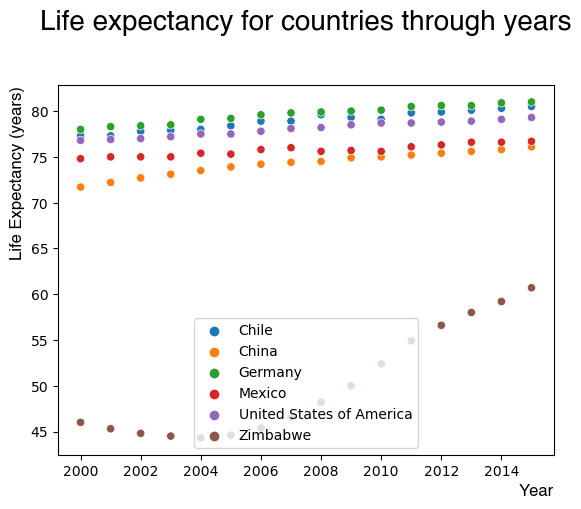

<Figure size 640x480 with 0 Axes>

In [94]:
ax1 = sns.scatterplot(x=df_renamed.year, y=df_renamed.life_exp_years, hue=df_renamed.country)
plt.legend(loc=8)
plt.title("Life expectancy for countries through years", pad=40, fontdict={"fontname":"Helvetica", "fontsize":"20", "weight": "bold"})
plt.xlabel("Year", loc="right", fontdict={"fontname":"Helvetica", "fontsize":"12", "weight": "bold"})
plt.ylabel("Life Expectancy (years)", loc="top", fontdict={"fontname":"Helvetica", "fontsize":"12", "weight": "bold"})
plt.show()
plt.clf()